In [1]:
import pymysql
import pandas as pd

In [2]:
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "ramdin$2172",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [3]:
queries = {
    "question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail" :
        """SELECT
            DATE_FORMAT(order_date, '%m') AS Month_ID,
            DATE_FORMAT(order_date, '%M') AS Month,
            DATE_FORMAT(order_date, '%Y') AS Year,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE YEAR(order_date) = 2021 
          AND is_valid = 1
        GROUP BY Month_ID, Month, Year
        ORDER BY total_transaction DESC;
    """,
    "question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail" :
    """
        SELECT
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            skudet.category,
            SUM(ordet.after_discount) AS total_transaction
        FROM
            order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE
            ordet.is_valid = 1 
            AND DATE_FORMAT(ordet.order_date, '%Y') = '2022'
        GROUP BY
            DATE_FORMAT(ordet.order_date, '%Y'),
            skudet.category
        ORDER BY
            total_transaction DESC;
    """,
    "question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail":
    """
        WITH final_table AS (
            SELECT
                skudet.category,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
            FROM order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE ordet.is_valid = 1
            GROUP BY skudet.category
        )
        SELECT *, (transaction_2022 - transaction_2021) AS delta,
        CASE WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' ELSE 'DECREASE' END AS remark
        FROM final_table;
    """,
    "question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail" :
    """
        SELECT
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            COUNT(DISTINCT ordet.id) AS freq
        FROM
            order_detail AS ordet
        JOIN
            payment_detail AS paydet ON ordet.payment_id = paydet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y')
        ORDER BY
            freq DESC
        LIMIT 5;
    """,
    "question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data." :
    """
        WITH final_table AS (
            SELECT
                CASE
                    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                    WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                         OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                         OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                    WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
                END AS product_brand,
                SUM(ordet.after_discount) AS total_transaction
            FROM
                order_detail AS ordet
            JOIN
                sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE
                ordet.is_valid = 1
            GROUP BY
                product_brand
        )
        SELECT *
        FROM final_table
        WHERE product_brand IS NOT NULL
        ORDER BY total_transaction DESC;
    """
}

In [4]:
from IPython.display import display

In [5]:
# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail ---


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,year,category,total_transaction
0,2022,Mobiles & Tablets,9.128256e+08
1,2022,Entertainment,3.611392e+08
2,2022,Appliances,3.095840e+08
3,2022,Computing,2.124082e+08
4,2022,Men Fashion,1.333326e+08
5,2022,Women Fashion,9.023613e+07
6,2022,Home & Living,7.865896e+07
7,2022,Health & Sports,5.200838e+07
8,2022,Beauty & Grooming,4.559842e+07
9,2022,Superstore,3.264327e+07



--- question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,INCREASE
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,INCREASE
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,INCREASE
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE



--- question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail ---


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data. ---


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [6]:
import os

In [7]:
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "ramdin$2172",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [8]:
# Folder path to save CSV files
output_folder = r"C:\Users\asjit\Google Looker project"  # Replace with your folder path
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

In [9]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  # Add your table names here

In [10]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\asjit\AppData\Local\Temp\ipykernel_17860\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\asjit\Google Looker project\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\asjit\Google Looker project\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\asjit\Google Looker project\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\asjit\Google Looker project\customer_detail.csv.
Database connection closed.


In [10]:
df_od = pd.read_csv("order_detail.csv")
df_sd = pd.read_csv("sku_detail.csv")
df_pd = pd.read_csv("payment_detail.csv")
df_cd = pd.read_csv("customer_detail.csv")

In [11]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [12]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_price       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [13]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [14]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [15]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [16]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5764 non-null   object        
 1   customer_id      5764 non-null   object        
 2   order_date       5764 non-null   datetime64[ns]
 3   sku_id           5764 non-null   object        
 4   price            5764 non-null   int64         
 5   qty_ordered      5764 non-null   int64         
 6   before_discount  5764 non-null   float64       
 7   discount_amount  5764 non-null   float64       
 8   after_discount   5764 non-null   float64       
 9   is_gross         5764 non-null   int64         
 10  is_valid         5764 non-null   int64         
 11  is_net           5764 non-null   int64         
 12  payment_id       5764 non-null   int64         
 13  sku_name         5764 non-null   object        
 14  base_price       5764 non-null   float64

In [17]:
Question 1
Dear Data Analyst,

As part of our Year-End Festival competition, the company plans to award prizes to our top customers.
To facilitate this, the Marketing Team requires an analysis to estimate the prizes for the winners.
 Specifically, we need data on the TOP 5 Products in the Mobiles & Tablets Category for the year 2022, ranked by 
the highest sales quantities (where valid = 1). We would appreciate it if you could compile 
and share this information with us before the end of this month to ensure we meet our planning deadlines.

Thank you for your continued support and collaboration.

Best regards, Marketing Teameting Team

SyntaxError: invalid syntax (3004817606.py, line 1)

In [20]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

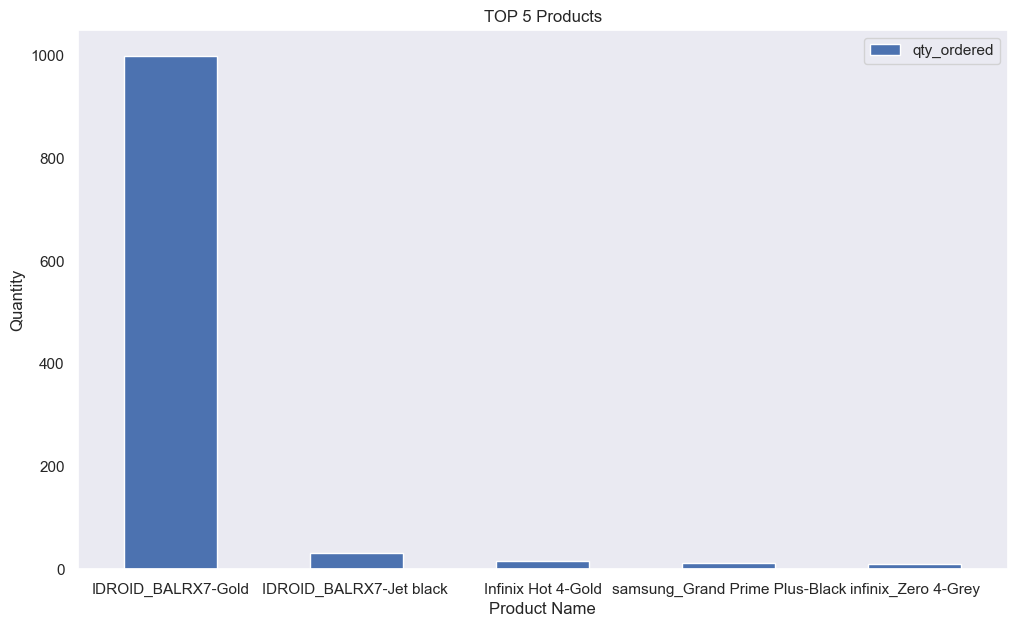

In [21]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = False,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
            table= False,
           secondary_y = False)

<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

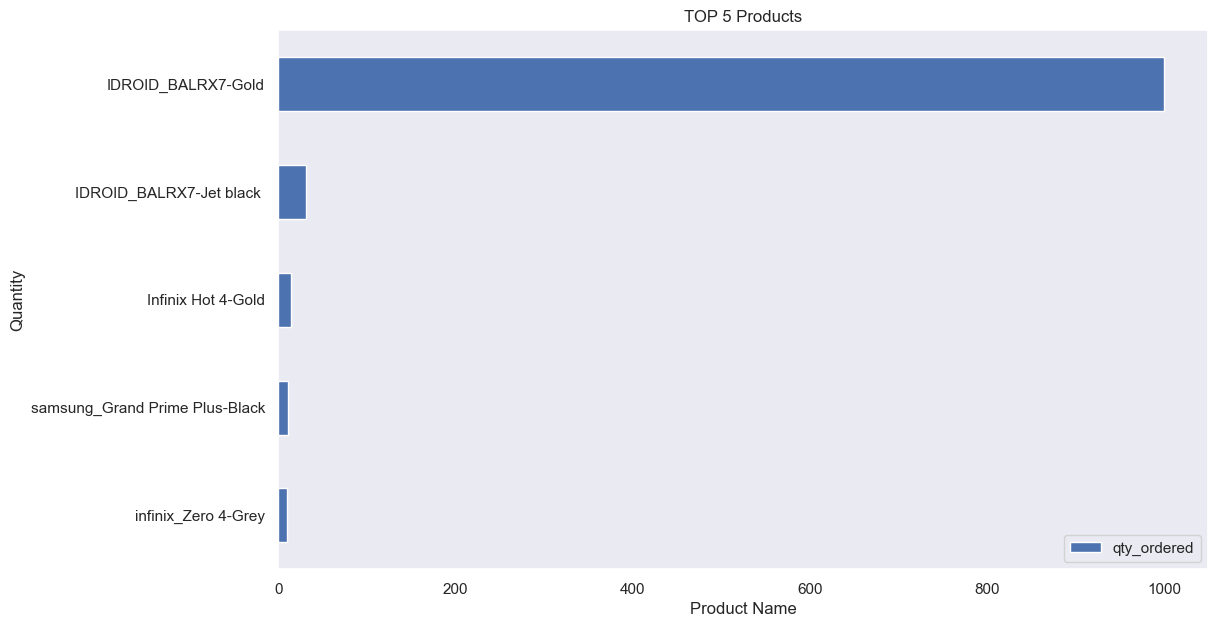

In [23]:
top_5_prod.sort_values(by=['qty_ordered'],ascending=True,inplace=True)
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh',
           grid = False,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
            table= False,
           secondary_y = False)

In [ ]:
Question 2
Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in the “Others” category as of the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021.
(Please also include data for the 15th category.)

If a decrease in sales quantity for the “Others” category is confirmed, we would appreciate it if you could provide details of the top 20 products
that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

Please share the requested data within 4 days. We sincerely appreciate your assistance and cooperation.

Best regards, Warehouse Team

In [24]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,164,152
2,Books,171,195
3,Computing,109,151
4,Entertainment,73,149
5,Health & Sports,168,197
6,Home & Living,189,249
7,Kids & Baby,166,224
8,Men Fashion,235,173
9,Mobiles & Tablets,107,1153


In [25]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,422,254,-168,-39.81,DOWN
1,Soghaat,753,607,-146,-19.39,DOWN
2,Men Fashion,235,173,-62,-26.38,DOWN
3,Beauty & Grooming,164,152,-12,-7.32,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,168,197,29,17.26,UP
7,Computing,109,151,42,38.53,UP
8,School & Education,182,235,53,29.12,UP
9,Kids & Baby,166,224,58,34.94,UP


Text(0.5, 0, 'Quantity')

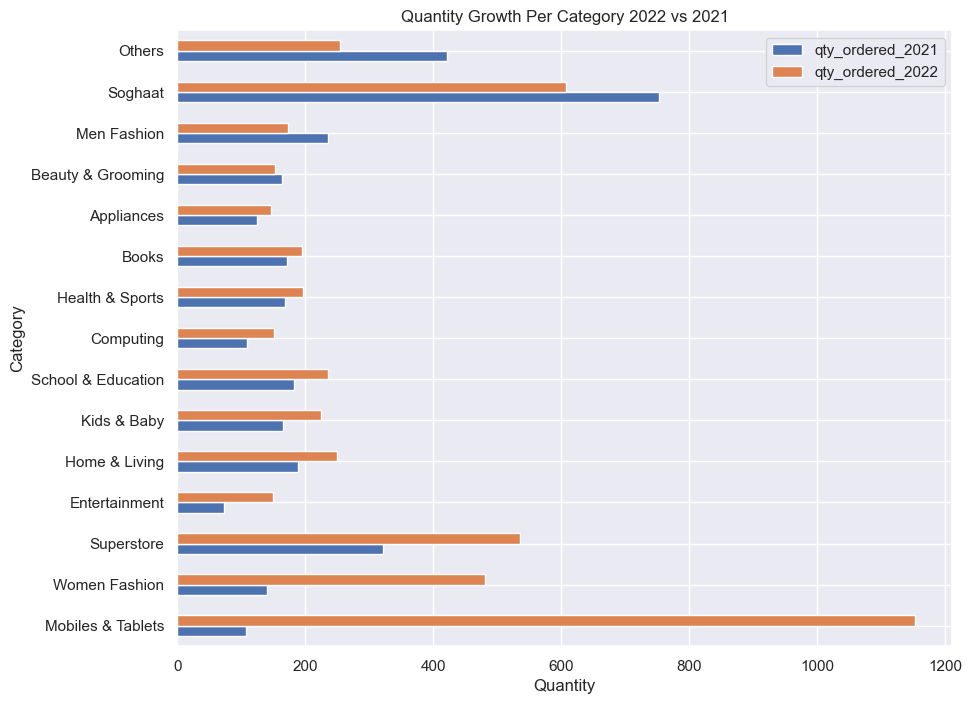

In [27]:
import matplotlib.pyplot as plt
# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['qty_ordered_2021','qty_ordered_2022'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Quantity Growth Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

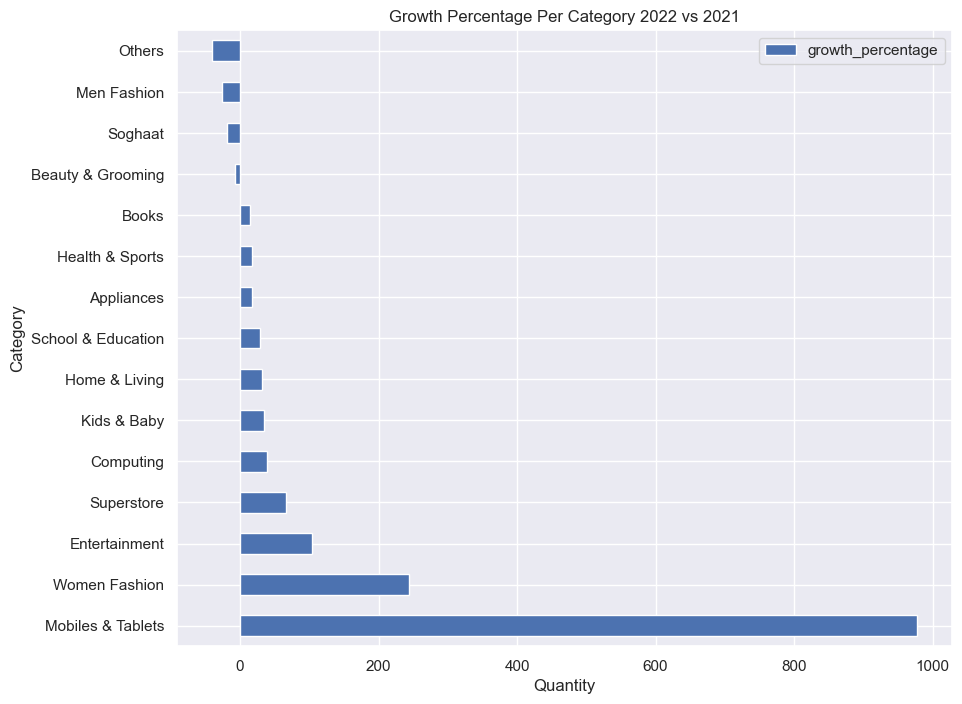

In [28]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['growth_percentage'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [29]:
# Answer 2.2

# Create dataframe with filter category = Others, year of 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(\
                           # filter 2022
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2022)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# Create dataframe with filter category = Others, year of 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(\
                           # filter 2021
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2021)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# JOIN the dataframes
others_2021_2022 = others_2021.merge(others_2022[['sku_name', 'qty_ordered_2022']], how='outer', on='sku_name')

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,NaN,NaN,1.0
4,Am-PTV_ATS-004-M,Others,5.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0
159,test-product-00,NaN,NaN,1.0
160,tucano_IPD7AN-BK,Others,1.0,NaN


In [30]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\asjit\AppData\Local\Temp\ipykernel_17860\3842611649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,Others,0.0,1.0
4,Am-PTV_ATS-004-M,Others,5.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0
159,test-product-00,Others,0.0,1.0
160,tucano_IPD7AN-BK,Others,1.0,0.0


In [31]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,23.0,0.0,-23.0,DOWN
2,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,20.0,0.0,-20.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,13.0,0.0,-13.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,7.0,7.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,8.0,8.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,13.0,13.0,UP
160,SKMT_Medicine,Others,0.0,20.0,20.0,UP


C:\Users\asjit\AppData\Local\Temp\ipykernel_17860\1013559605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

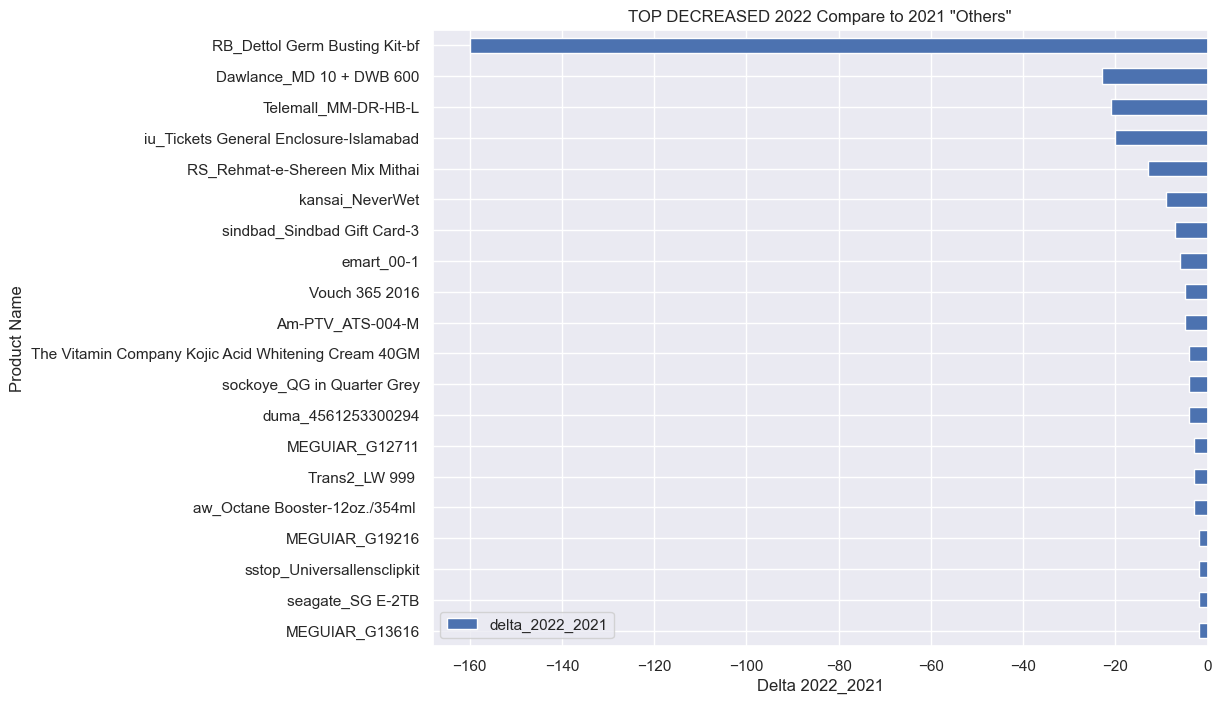

In [32]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',\
                      y='delta_2022_2021',\
                      kind='barh',\
                      figsize=(10, 8))
plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')

In [ ]:
Question 3
Dear Data Analyst,

As we prepare for the company’s upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not yet made a payment (is_gross = 1) during the year 2022. Specifically, we need the Customer IDs and their Registered Dates.

We kindly request your assistance in compiling and delivering this data to the Digital Marketing Team before the month’s end. Your support in this matter is greatly appreciated.

Best regards, Digital Marketing Team

In [33]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
cs_gross_data

,customer_id,registered_date
0,C993531L,2021-11-08
8,C652751L,2022-07-19
19,C189144L,2022-07-01
22,C224183L,2022-04-07
23,C907186L,2022-05-08
...,...,...
5729,C217246L,2022-08-04
5734,C577176L,2022-06-01
5742,C744990L,2022-05-21
5756,C317976L,2021-11-26


In [34]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 1023]


In [35]:
# run the logic
if test[0] == test[1]:
  print('There is no duplicated data.')
else:
  print('There is duplicated data.')
  # remove the duplicate
  cs_gross_data.drop_duplicates(inplace=True)
  print('Data After : ', check_customerid(cs_gross_data))

# reset the index and show final data
cs_gross_data.reset_index(drop=True, inplace=True)
cs_gross_data

There is duplicated data.
Data After :  [820, 820]


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


In [ ]:
Question 4
Dear Data Analyst,

Between October and December 2022, we ran promotional campaigns every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales (before_discount) for weekends (Saturday and Sunday) compared to weekdays (Monday-Friday) for each month during this period. Please specify whether sales increased during weekends for each month.

The average daily sales (before_discount) for weekends versus weekdays across the entire three-month period.

We kindly request the data to be shared with us by the end of next week. Thank you for your continued support.

Best regards, Campaign Team

In [36]:
# Answer No 4.1

# add column month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [37]:
# Create dataframe for weekends data October-December 2022
data_weekends = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekends')\
                             .sort_values(by='month_id', ascending=True)
                             )

# Create dataframe for weekdays data October-December 2022
data_weekdays = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekdays')\
                             .sort_values(by='month_id', ascending=True)
                             )

# merge the dataframe
data_weekdays_weekends = data_weekdays.merge(data_weekends)

# show the data
data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month Name', ylabel='Average Sales'>

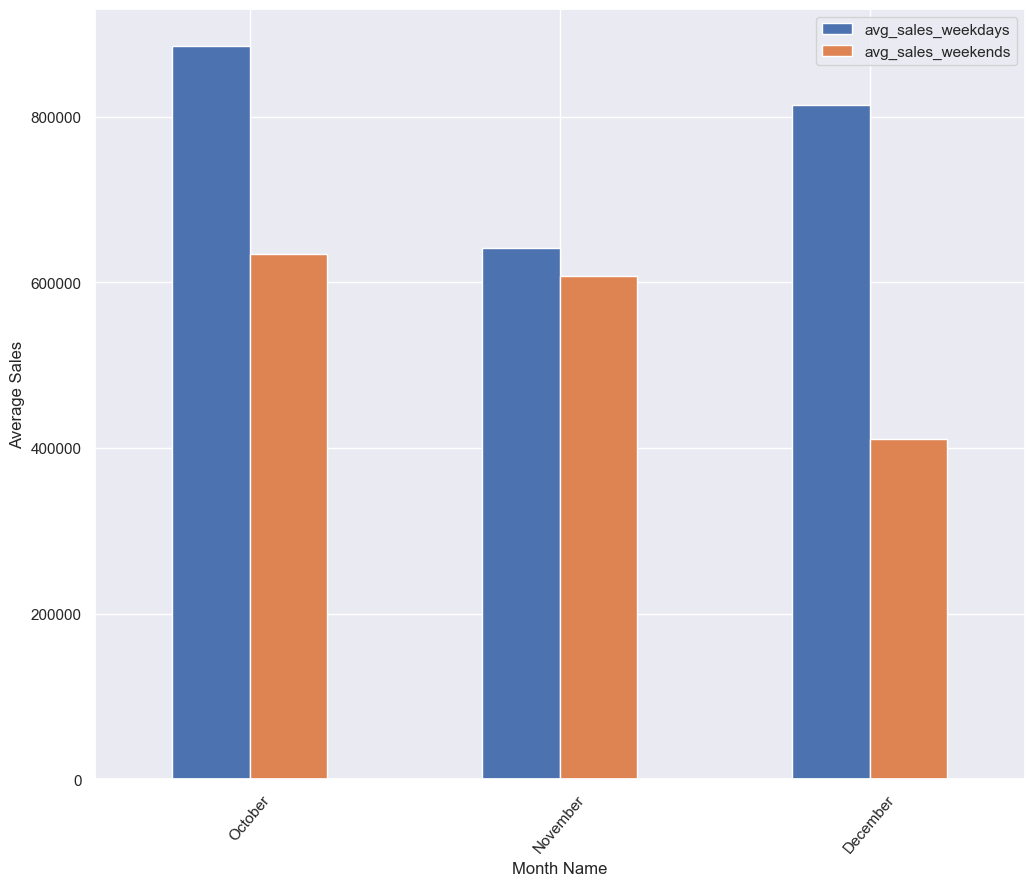

In [38]:
# plot the data
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 50,  # for rotate the text in xlabel
                            table = False,
                            secondary_y = False)

In [39]:
# Answer No 4.2

# Filter dataframe df for weekends, October-December 2022
data_weekends_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Filter dataframe df for weekdays, October-December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {\
                        'Period':'Total 3 months',\
                        'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(),2),\
                        'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(),2),\
                        'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(),2),\
                        'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Period', ylabel='Average Sales'>

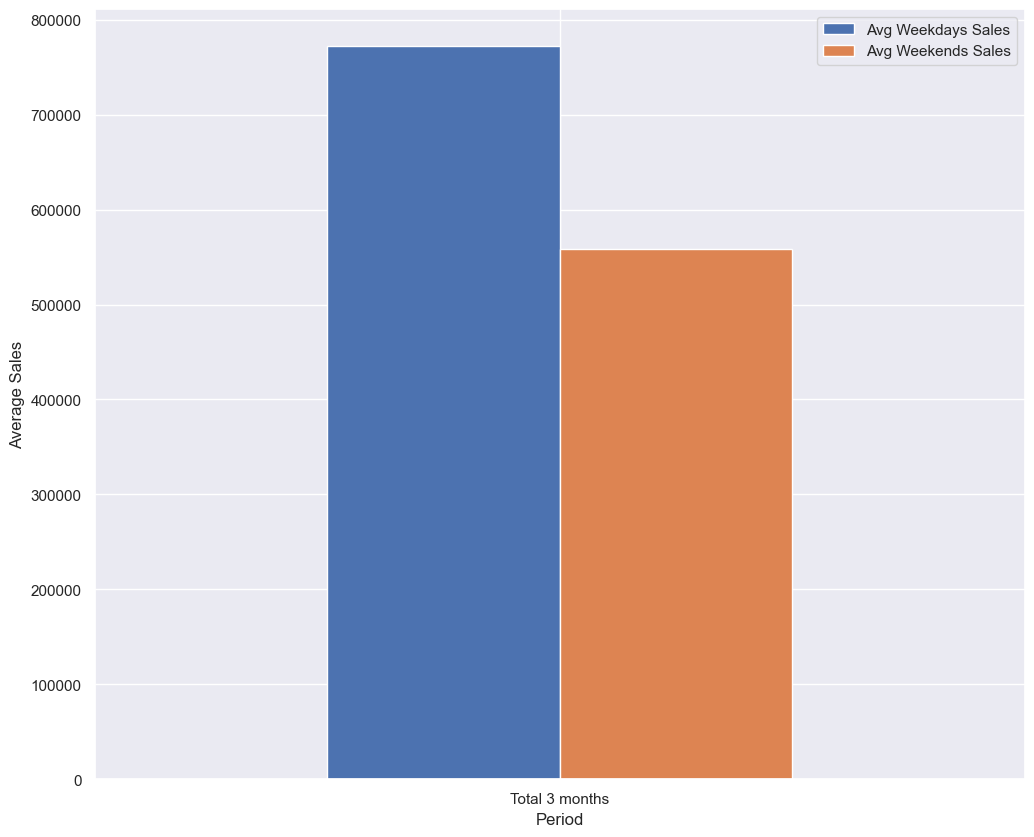

In [40]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Period',
                                  y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                  kind='bar',
                                  grid = True,
                                  # xlabel = 'Month Name',
                                  ylabel = 'Average Sales',
                                  figsize=(12,10),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

In [42]:
# Specify the file path and name
file_path = r"C:\Users\asjit\Downloads\Google Looker project\dataset\finaldataset.csv"  # Update with your desired folder path

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\Users\asjit\Downloads\Google Looker project\dataset\finaldataset.csv


In [ ]:
Project

In [ ]:
1.	Question 1: Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: 
The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products
in the "Mobiles & Tablets" category that had the highest sales quantities in 2022.
The products should be filtered to ensure only valid orders are included. Requirements: 
• Filter the data to include only products from the "Mobiles & Tablets" category in 2022,
where the is_valid feature is set to 1. • Group the data by sku_name and category,
and sum the qty_ordered for each product. • Rank the products based on their total sales 
quantity in descending order. • Display the top 5 products with the highest sales quantities. 
• Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use:
• category • order_date (for filtering by year) • is_valid (to filter valid orders) 
• sku_name (for product names) • qty_ordered (for sales quantities)

In [18]:
# Answer of Q1
top5_prod = pd.DataFrame(\
                          # to filter the columns as needed and asked in the question
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregating the data by sku name and category thereby displaying it
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value in descending order by total sales quantity
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 data 
                          .head(5).reset_index(drop=True))
top5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

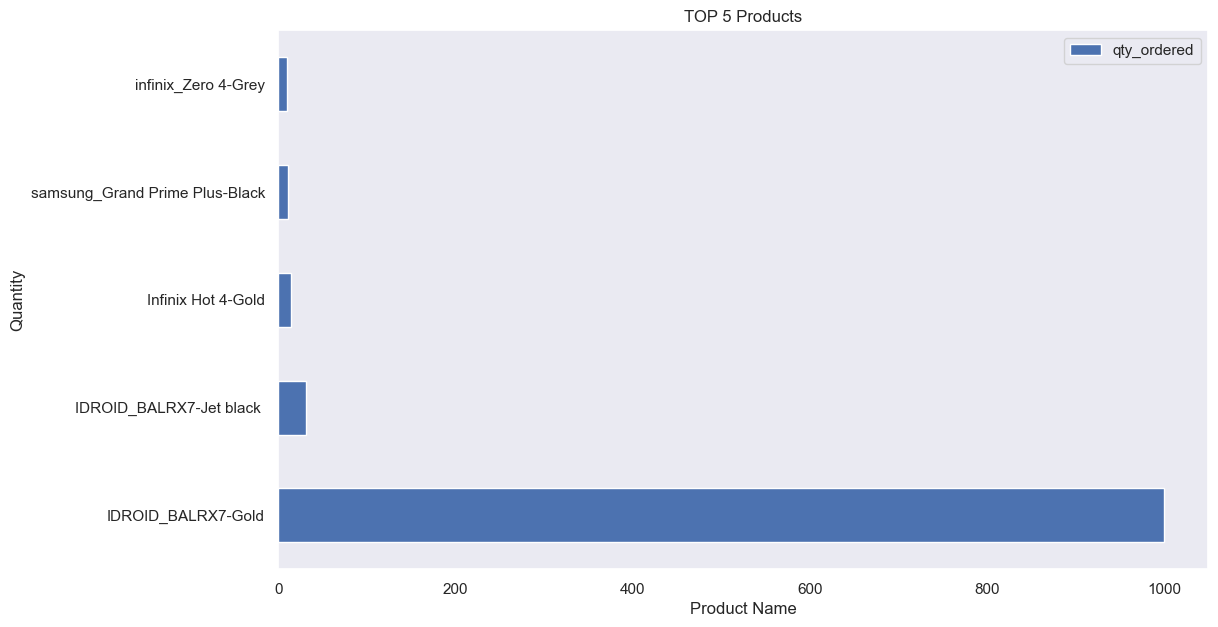

In [19]:
#  to show the bar horizontal graph
import seaborn as sns
# plot
sns.set()
top5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh',
           grid = False,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
            table= False,
           secondary_y = False)

In [45]:
Conclusion from the above analysis - The top 5 products from the mobile and tablet category in the decreasing order by sales are 
1 IDROID_BALRX7-Gold	
2	IDROID_BALRX7-Jet black	
3	Infinix Hot 4-Gold	
4	samsung_Grand Prime 
5	infinix_Zero 4-Grey	

SyntaxError: invalid syntax (881269267.py, line 1)

In [ ]:
 Q3. Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022 Scenario: 
 The Warehouse Team has observed a surplus in the stock of "Others" category products
 at the end of 2022. They would like to know if sales have declined in 2022 compared to 2021. 
 Additionally, they want to see the 20 products that experienced the largest decrease in sales.
 Requirements: 1. Create two datasets: o One for sales data in 2021 (qty_ordered for "Others" category).
 o One for sales data in 2022 (qty_ordered for "Others" category). 2. Merge the datasets and calculate 
 the sales difference between 2022 and 2021. 3. Calculate the percentage change in sales and classify 
 it as "DOWN", "UP", or "FAIR". 4. Sort the products by the largest decrease in sales and show the top 20 products.
 5. Create a horizontal bar chart to display the products with the largest decrease in sales between 2022 and 2021.
 Key Features to Use: • category • order_date (for filtering by year) • is_valid • sku_name • qty_ordered

In [20]:
# Answer to Q3.1
cat_data_2022 = pd.DataFrame(\
                            # to filter the data of 2022 based on the given conditions
                             df[(df['order_date'].dt.year==2022) & (df['is_valid']==1)]\
                            # aggregate the data based on  category by the total sales quantity
                             .groupby(by=['category'])['qty_ordered'].sum()\
                            # reset the index to convert the dataframe to result
                             .reset_index(name='qty_ordered_2022')\
)

cat_data_2021 = pd.DataFrame(\
                            # to filter the data of 2021 based on the given conditions
                             df[(df['order_date'].dt.year==2021) & (df['is_valid']==1)]\
                            # aggregate the data based on  category by the total sales quantity
                             .groupby(by=['category'])['qty_ordered'].sum()\
                            # reset the index to convert the dataframe to result
                             .reset_index(name='qty_ordered_2021')\
)
#merge the sales data of 2021 and 2022 in across all categories 
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022,how = 'outer', on='category')
# displaying the results
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,164,152
2,Books,171,195
3,Computing,109,151
4,Entertainment,73,149
5,Health & Sports,168,197
6,Home & Living,189,249
7,Kids & Baby,166,224
8,Men Fashion,235,173
9,Mobiles & Tablets,107,1153


In [25]:
# add column delta_2022_2021
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

def updownfair(delta):
    if delta <0 :
        return "DOWN"
    elif delta>0:
        return "UP"
    else:
        return "FAIR"
# converting the quantity growth over 2021 and 2022 into percentage
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021']*100),2))

# add column remark using function "updownfair"
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updownfair)

#  to sort values in ascending order
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)

#  to reset the index
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# showing the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,422,254,-168,-39.81,DOWN
1,Soghaat,753,607,-146,-19.39,DOWN
2,Men Fashion,235,173,-62,-26.38,DOWN
3,Beauty & Grooming,164,152,-12,-7.32,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,168,197,29,17.26,UP
7,Computing,109,151,42,38.53,UP
8,School & Education,182,235,53,29.12,UP
9,Kids & Baby,166,224,58,34.94,UP


Text(0.5, 0, 'Quantity')

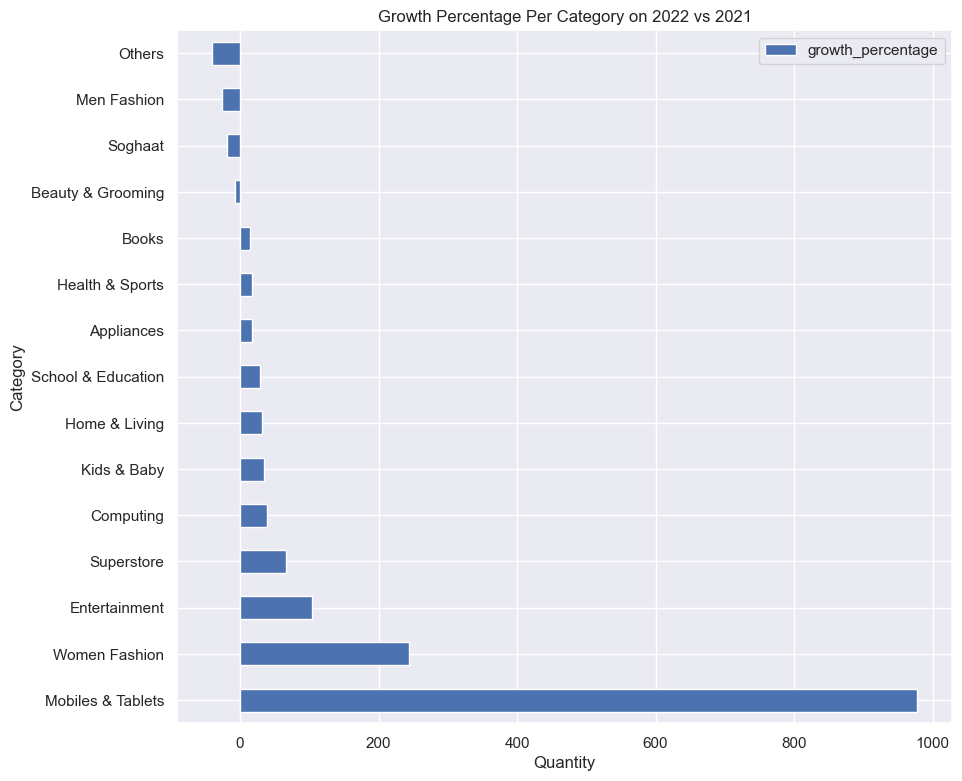

In [26]:
import matplotlib.pyplot as plt

# sorting by growth percentage in descending order before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y='growth_percentage',\
                        kind='barh',\
                        figsize=(10, 9)\
                        )
plt.title('Growth Percentage Per Category on 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [ ]:
Conclusion from the above Analysis - It is indeed true that there is a decrease in sales for the Others category. 
In fact the largest decrease in sales has been in others quantity with a net difference of 168 sales quantity and
a reduction in growth percentage of 39.81 %. Now, we will see which are the top 20 products in the 'Others' category which have faced
the largest decrease in sales.

In [27]:
# Answer to Q3.2
sales_data_2022 = pd.DataFrame(\
                            # to filter the data of 2022 based on the given conditions
                             df[(df['category']=='Others') & (df['order_date'].dt.year==2022) & (df['is_valid']==1)]\
                            # aggregate the data based on sku name and category by the total sales quantity
                             .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                            # reset the index to convert the dataframe to result
                             .reset_index(name='qty_ordered_2022')\
)

sales_data_2021 = pd.DataFrame(\
                            # to filter the data of 2021 based on the given conditions
                             df[(df['category']=='Others') & (df['order_date'].dt.year==2021) & (df['is_valid']==1)]\
                            # aggregate the data based on sku name and category by the total sales quantity
                             .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                            # reset the index to convert the dataframe to result
                             .reset_index(name='qty_ordered_2021')\
)
#merge the sales data of 2021 and 2022 in others category 
sales_data_2021_2022 = sales_data_2021.merge(sales_data_2022[['sku_name','qty_ordered_2022']],how = 'outer', on='sku_name')
# display the results
sales_data_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,NaN,NaN,1.0
4,Am-PTV_ATS-004-M,Others,5.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0
159,test-product-00,NaN,NaN,1.0
160,tucano_IPD7AN-BK,Others,1.0,NaN


In [50]:
# replace "NaN" with "Others" in column "category"
sales_data_2021_2022['category'].fillna('Others', inplace=True)

# replace the rest "NaN" with 0
sales_data_2021_2022.fillna(0, inplace=True)

# show the data results
sales_data_2021_2022

C:\Users\asjit\AppData\Local\Temp\ipykernel_17860\4070360550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,Others,0.0,1.0
4,Am-PTV_ATS-004-M,Others,5.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0
159,test-product-00,Others,0.0,1.0
160,tucano_IPD7AN-BK,Others,1.0,0.0


In [28]:
# add column delta_2022_2021
sales_data_2021_2022['delta_2022_2021'] = sales_data_2021_2022['qty_ordered_2022'] - sales_data_2021_2022['qty_ordered_2021']

# add column remark using function "updownfair"
sales_data_2021_2022['remark'] = sales_data_2021_2022['delta_2022_2021'].apply(updownfair)

#  to sort values in ascending order
sales_data_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

#  to reset the index
sales_data_2021_2022.reset_index(drop=True, inplace=True)

# showing the data
sales_data_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0,DOWN
1,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
2,kansai_NeverWet,Others,10.0,1.0,-9.0,DOWN
3,emart_00-1,Others,7.0,1.0,-6.0,DOWN
4,MEGUIAR_G12711,Others,4.0,1.0,-3.0,DOWN
...,...,...,...,...,...,...
157,stripyinterior_100004,NaN,NaN,1.0,NaN,FAIR
158,stripyinterior_100006,Others,1.0,NaN,NaN,FAIR
159,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0,NaN,FAIR
160,test-product-00,NaN,NaN,1.0,NaN,FAIR


C:\Users\asjit\AppData\Local\Temp\ipykernel_2612\615590546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_2021_2022.sort_values(by='delta_2022_2021',ascending=False,inplace=True)


Text(0.5, 0, 'Difference in sales')

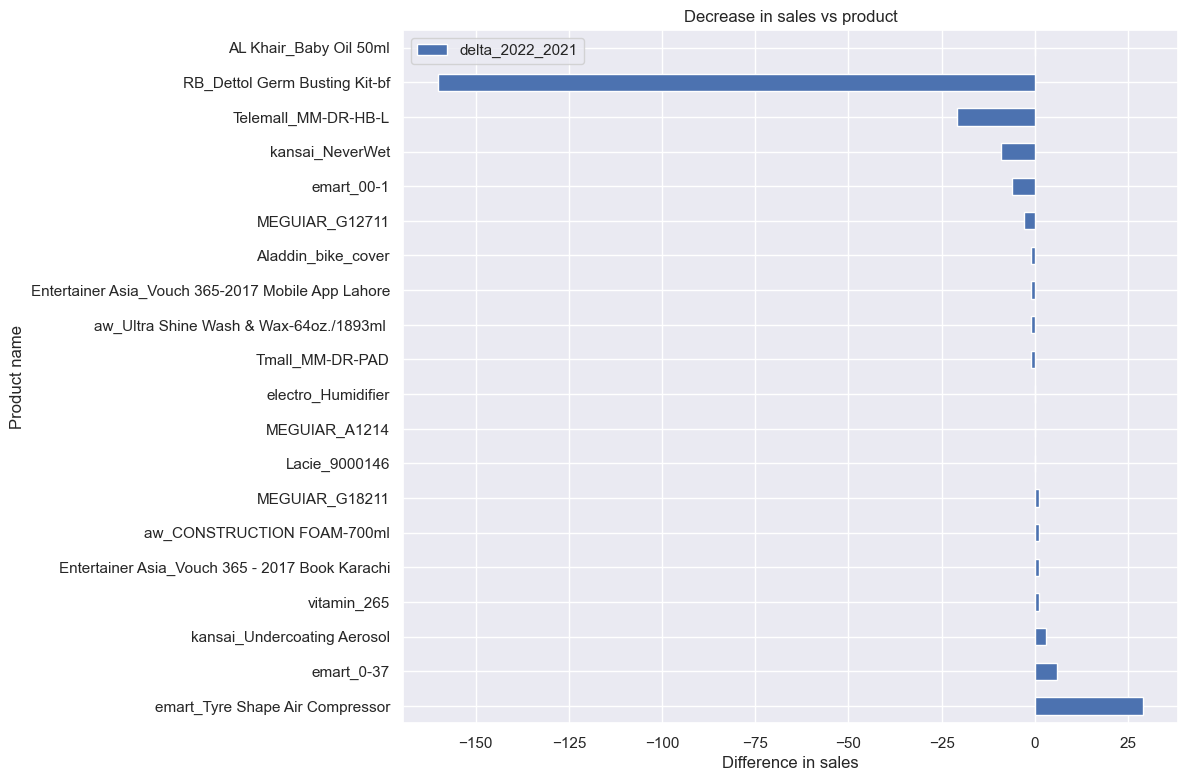

In [29]:
# Getting the top 20 products with decreased sales
sales_data_2021_2022 = sales_data_2021_2022.head(20)
#arranging the top 20 products by the delta_2022_2021
sales_data_2021_2022.sort_values(by='delta_2022_2021',ascending=False,inplace=True)

# plotting the above results

sns.set()
sales_data_2021_2022.plot(\
                          x='sku_name',\
                          y='delta_2022_2021',\
                          kind= 'barh',\
                          figsize= (10,9)\
)
plt.title('Decrease in sales vs product')
plt.ylabel('Product name')
plt.xlabel('Difference in sales')

In [ ]:
Conclusion- We got the top 20 products with the largest decrease in sales between 2021 and 2022.

In [ ]:
Question 4. Identifying Customers Who Completed Checkout but Didnt Pay in 2022 Scenario: 
The Digital Marketing Team wants to identify customers who completed the checkout 
process but did not make a payment in 2022. This will help them reach out for promotional purposes. 
Requirements: • Filter the data to find records where is_gross is 1 (indicating completed check out
• Retrieve the customer_id and registered_date for these records. 
• Ensure there are no duplicate customer_id entries. 
• Share the compiled data with the Marketing Team. 
 Key Features to Use: 
• is_gross (for checkout status) • is_valid, is_net (to filter invalid or net transactions)
• order_date (for filtering by year) • customer_id
• registered_dateckout but no payment), is_valid is 0, and is_net is 0, for the year 2022.

In [30]:
#Answer to Q4
customer_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
customer_gross_data


,customer_id,registered_date
0,C993531L,2021-11-08
8,C652751L,2022-07-19
19,C189144L,2022-07-01
22,C224183L,2022-04-07
23,C907186L,2022-05-08
...,...,...
5729,C217246L,2022-08-04
5734,C577176L,2022-06-01
5742,C744990L,2022-05-21
5756,C317976L,2021-11-26


In [31]:
#first check for the unique customer id count

def check_custid(x):
    unique_custid = len(x['customer_id'].unique().tolist())
    row_count = len(x)
    return [unique_custid,row_count]
    
 #getting the unique and total customer id count
test = check_custid(customer_gross_data)
print("Data Before :", test)

Data Before : [820, 1023]


In [32]:
# printing the message 
if test[0] == test[1]:
    print("No duplicate data")
else:
    print("There is duplicate data")

# removing the duplicate data from the dataset
customer_gross_data.drop_duplicates(inplace=True)
print("Data After:", check_custid(customer_gross_data))

#reset the index and display the data
customer_gross_data.reset_index(drop=True,inplace=True)
customer_gross_data

There is duplicate data
Data After: [820, 820]


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


In [ ]:
Conclusion of the analysis - Thus we have removed the duplicate customer ids indicating 
that there are customers who completed the checkout 
process but did not make a payment in 2022. Total 203 duplicate entries have been detected
and subsequenty removed. 

In [ ]:
5. Comparing Weekend and Weekday Sales in Q4 2022 Scenario: 
The Campaign Team wants to evaluate the effectiveness of their weekend promotional campaigns
(Saturdays and Sundays) between October and December 2022 by comparing the average daily sales
during weekends vs weekdays. Requirements: 1. Calculate the average daily sales (before_discount) 
for weekends (Saturdays and Sundays) and weekdays (Monday to Friday) for each month (October, November, and December 2022).
2. Calculate the average sales for weekends vs weekdays for the entire three-month period. 
3. Share insights on whether sales increased during weekends. Key Features to Use: 
• order_date (for filtering by date and identifying days of the week) 
• before_discount (for sales data) • month_id, month_name, day_name, year (for extracting date-related information)

In [33]:
# Answer to Q5.1

# add columns month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [34]:
# to filter the data for weekends, October to December 2022.

weekends_data_all = pd.DataFrame(\
                              #filter 
                             df[(df['year']==2022) &\
                             (df['day_name'].isin(['Saturday','Sunday'])) &\
                              (df['is_valid']==1) &\
                              (df['month_id']>=10)]\
                             #aggregating by month id, month name, year and getting the average every month
                              .groupby(by=['month_id','month_name','year'])['before_discount'].mean()\
                             # round the mean upto 2 decimal places
                              .round(2)\
                              # reset the index
                              .reset_index(name='avg_weekend_sales')\
                             # sort the data by month id in increasing order
                              .sort_values(by='month_id',ascending=True))

# to filter the data for weedays, October to December 2022.

weekdays_data_all = pd.DataFrame(\
                             df[(df['year']==2022) &\
                             (df['day_name'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))&\
                              (df['is_valid']==1) &\
                              (df['month_id']>=10)]\
                              .groupby(by=['month_id','month_name','year'])['before_discount'].mean()\
                              .round(2)\
                              .reset_index(name='avg_weekday_sales')\
                              .sort_values(by='month_id',ascending=True))

# comapring the weekdays and weekends sales across 3 months
compare_weekends_weekdays = weekdays_data_all.merge(weekends_data_all)

# getting the difference in sales between weekdays and weekend
compare_weekends_weekdays['Delta'] = weekends_data_all['avg_weekend_sales'] - weekdays_data_all['avg_weekday_sales']

compare_weekends_weekdays

,month_id,month_name,year,avg_weekday_sales,avg_weekend_sales,Delta
0,10,October,2022,885671.82,634260.0,-251411.82
1,11,November,2022,641861.93,607794.0,-34067.93
2,12,December,2022,813973.74,410599.4,-403374.34


<Axes: xlabel='Month Name', ylabel='Average Sales'>

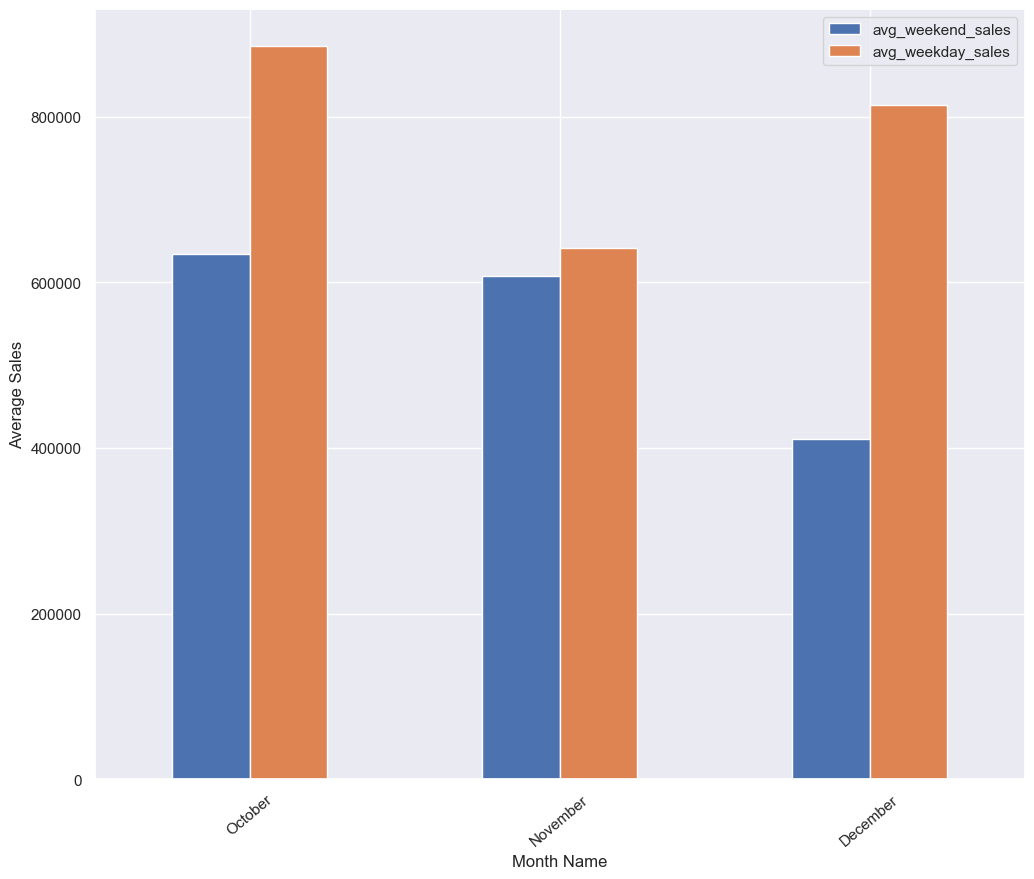

In [58]:
# to plot the above data
import seaborn as sns
sns.set()
compare_weekends_weekdays.plot(x='month_name',
                            y=['avg_weekend_sales','avg_weekday_sales'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 40,  # to rotate the text in xlabel by 40 degrees
                            table = False,
                            secondary_y = False)

In [59]:
# Answer No Q5.2

# to filter dataframe df for weekends, October-December 2022
weekends_data_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# to filter dataframe df for weekdays, October-December 2022
weekdays_data_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# to create dictionary 
three_month_avg_compare = {\
                        'Time Period':'Total 3 months',\
                        'Avg Weekday Sales': round(weekdays_data_all['before_discount'].mean(),2),\
                        'Avg Weekend Sales': round(weekends_data_all['before_discount'].mean(),2),\
                        'Diff in Value': round(weekends_data_all['before_discount'].mean() - weekdays_data_all['before_discount'].mean(),2),\
                        'Diff in %': pd.Series(round(((weekends_data_all['before_discount'].mean() - weekdays_data_all['before_discount'].mean())/weekends_data_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# to create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=three_month_avg_compare, index=[0])

# to show the data
compare_avg_weekends_weekdays

,Time Period,Avg Weekday Sales,Avg Weekend Sales,Diff in Value,Diff in %
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Time Period', ylabel='Average Sales'>

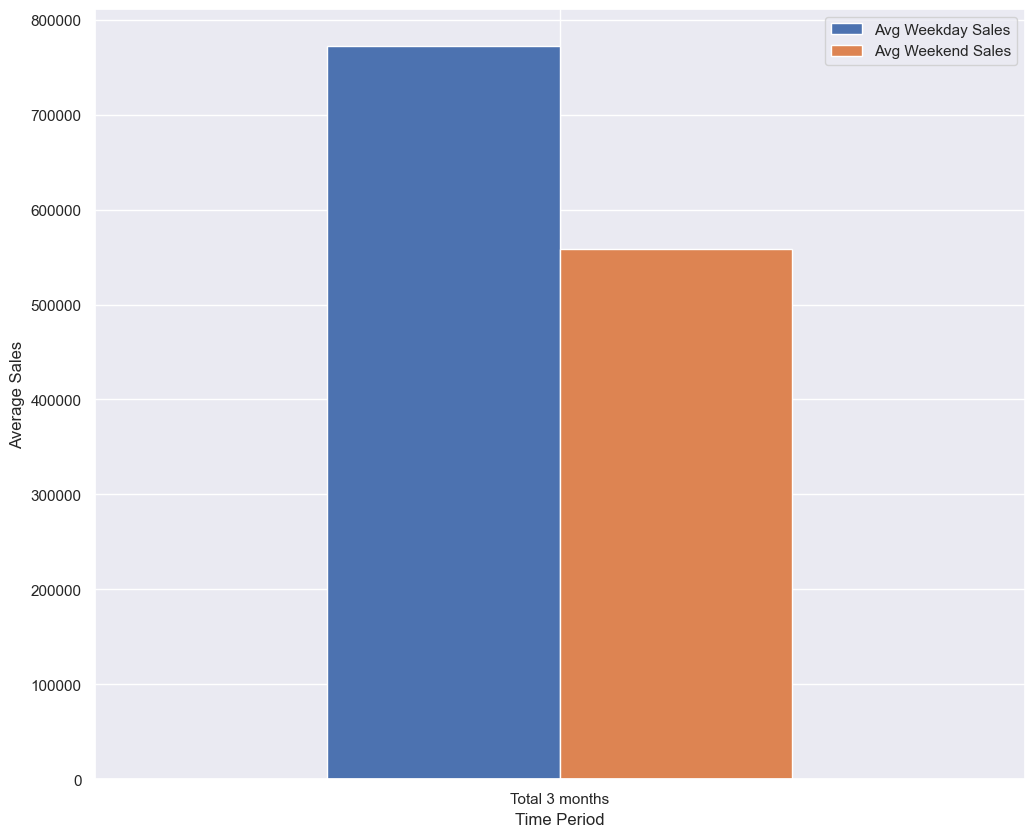

In [60]:
# to plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Time Period',
                                  y=['Avg Weekday Sales','Avg Weekend Sales'],
                                  kind='bar',
                                  grid = True,
                                  xlabel = 'Time Period',
                                  ylabel = 'Average Sales',
                                  figsize=(12,10),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

In [ ]:
Conclusion from the above analysis - From 5.1 , we can see that the average weekdays sales
is more than the average weekends sales. The highest difference being in December and lowest in Nivember.

From 5.2, we can see that there is a decrease in sales of 38.2% in weekends as compared to weekdays.
So, the weekend promotional campaign did not run as expected and in fact there is a big difference in sales
of weekends and weekdays.

In [ ]:
Q6.Finding Products with the Largest Decrease in Sales Between Two Periods (e.g., 2022 vs 2021) Scenario: 
The Sales Team would like to identify which products had the most significant decrease in sales between 
two periods (e.g., 2021 and 2022). Requirements: 1. Create two datasets for each period (e.g., 2021 and 2022),
aggregated by product (sku_name). 2. Calculate the sales difference between the two periods. 
3. Identify the products with the largest decrease in sales and show the top 10 products. 
4. Create a bar chart to visualize the products with the largest decrease in sales. Key Features to Use:
• sku_name (for product names) • order_date (for filtering by year) • qty_ordered (for sales data).

In [35]:
# Answer to Q6

 #Filter the dataframe by order year 2021 and is valid.
sales_2021 = pd.DataFrame(\
                         #filter
                         df[(df['order_date'].dt.year == 2021) &\
                         (df['is_valid'] == 1)]\
                         # aggregate by product name on the total quantity ordered 
                         .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                         # reset the index and renaming the new column 
                         .reset_index(name='2021_Sales')\
                         .sort_values(by='2021_Sales',ascending=True)
                         )

#Filter the dataframe by order year 2022 and is valid.
sales_2022 = pd.DataFrame(\
                         df[(df['order_date'].dt.year == 2022) &\
                         (df['is_valid'] == 1)]\
                         .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                         .reset_index(name='2022_Sales')\
                         .sort_values( by='2022_Sales',ascending=True)\
                         )
# merge the two datasets on common product name
sales_2021_2022 = sales_2021.merge(sales_2022, how="outer", on=['sku_name','category'])

#display the data
sales_2021_2022           

,sku_name,category,2021_Sales,2022_Sales
0,3m_70005045094,Superstore,1.0,NaN
1,3m_DC272923871,Superstore,1.0,NaN
2,4U_Service-KA 005,School & Education,NaN,3.0
3,4U_Service-KA 008,School & Education,NaN,1.0
4,A4-Tech_7200N,Computing,NaN,1.0
...,...,...,...,...
2466,zubairco_003577,School & Education,1.0,NaN
2467,zubairco_37455_scissor,School & Education,1.0,NaN
2468,zubairco_JOJI 2010 Pink,School & Education,1.0,NaN
2469,zuni16_315-A,Women Fashion,1.0,NaN


In [36]:
# replace the rest "NaN" with 0
sales_2021_2022.fillna(0, inplace=True)

# Just to see the sales in ascending order for better understanding and clarity
sales_2021_2022.sort_values(by=['2021_Sales','2022_Sales'],inplace=True)

# reset the index 
sales_2021_2022.reset_index(drop=True,inplace=True)

# show the data results
sales_2021_2022

,sku_name,category,2021_Sales,2022_Sales
0,4U_Service-KA 008,School & Education,0.0,1.0
1,A4-Tech_7200N,Computing,0.0,1.0
2,A4-Tech_Keyboard-Mouse-Wireless-3100N,Computing,0.0,1.0
3,AJ-bedsheet_AJB-002,Home & Living,0.0,1.0
4,AKL_A01136167-AW-05-Maroon,Women Fashion,0.0,1.0
...,...,...,...,...
2466,jn_900g,Superstore,52.0,10.0
2467,RS_Baklawa 500gm,Soghaat,107.0,18.0
2468,RB_Household Bundle,Superstore,113.0,0.0
2469,RS_Plain Rusk,Soghaat,160.0,0.0


In [38]:
# add column delta_2022_2021
sales_2021_2022['delta_2021_2022'] = sales_2021_2022['2022_Sales'] - sales_2021_2022['2021_Sales']

#  to sort values in ascending order
sales_2021_2022.sort_values(by='delta_2021_2022', ascending=True, inplace=True)

#  to reset the index
sales_2021_2022.reset_index(drop=True, inplace=True)

# Renaming the sku_name column to product name
sales_2021_2022.rename(columns={'sku_name':'Product_Name'},inplace=True)

# showing the top 10 decrease in sales
sales_final=sales_2021_2022.head(10)

sales_final

,Product_Name,category,2021_Sales,2022_Sales,delta_2021_2022
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0
1,RS_Plain Rusk,Soghaat,160.0,0.0,-160.0
2,RB_Household Bundle,Superstore,113.0,0.0,-113.0
3,RS_Baklawa 500gm,Soghaat,107.0,18.0,-89.0
4,RS_Honey Dry Fruit Halwa,Soghaat,52.0,0.0,-52.0
5,CA_shirt-Small,Men Fashion,50.0,0.0,-50.0
6,RS_Soan Papri-250gm,Soghaat,51.0,7.0,-44.0
7,jn_900g,Superstore,52.0,10.0,-42.0
8,Mardaz_MDZ-P-18-M,Men Fashion,34.0,0.0,-34.0
9,Topline_Waheed Murad His Life and Our Times,Books,41.0,10.0,-31.0


Text(0.5, 0, 'Product')

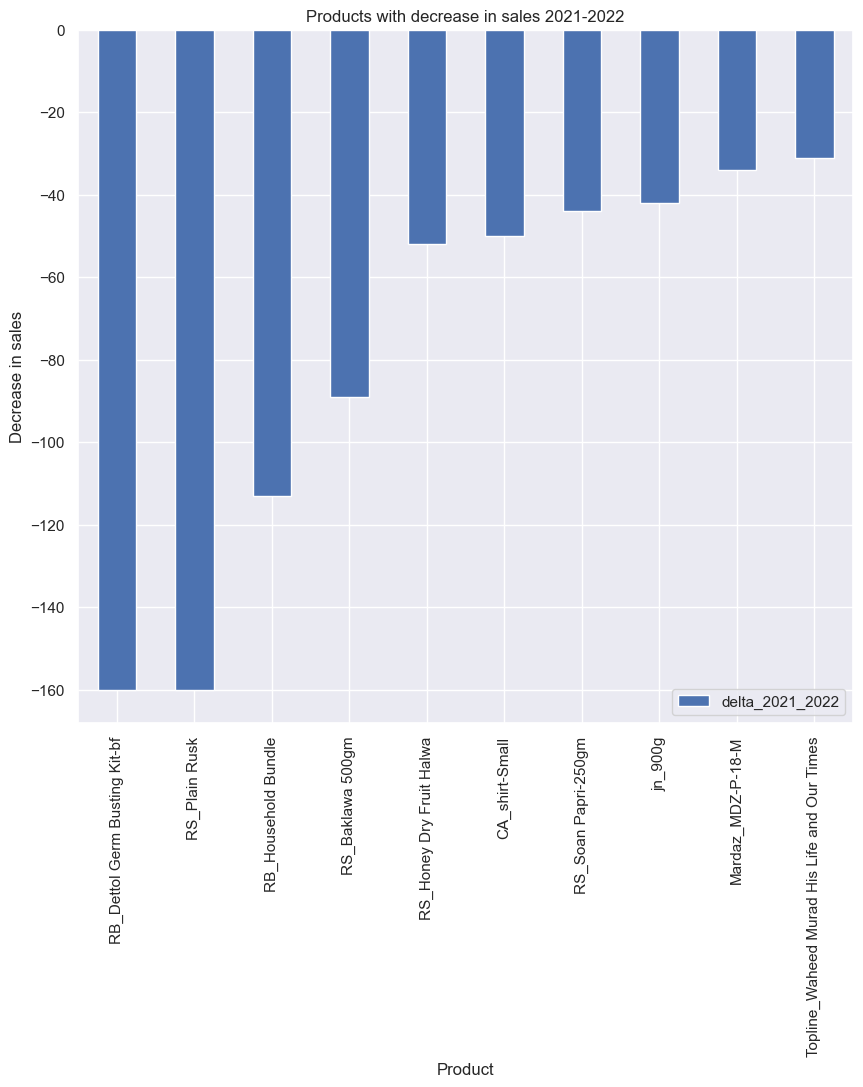

In [39]:
# show the decrease in sales
import matplotlib.pyplot as plt

sns.set()
sales_final.plot(x='Product_Name',\
                        y=['delta_2021_2022'],\
                        kind='bar',\
                        rot=90,\
                        figsize=(10, 9)\
                        )
plt.title('Products with decrease in sales 2021-2022')
plt.ylabel('Decrease in sales')
plt.xlabel('Product')

In [ ]:
Conclusion of the above analysis - The largest decrease in sales from 2021 to 2022 are above. 
The categories are also stated alongside the products. 

In [64]:
# Specify the file path and name
file_path = r"C:\Users\asjit\Downloads\Google Looker project\dataset\finaldataset2.csv"  # Update with your desired folder path

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\Users\asjit\Downloads\Google Looker project\dataset\finaldataset2.csv
